###  Opening a restaurant in New York City

### 1. Introduction

Opening a new restaurant is very challenging, especially in NYC. The city is already filled with many restaurants. So how can we help new business owners find the perfect location for opening a new business? One of the keys for success is being unique - we need to find the best location to start a new business, preferably with the least amount of identical restaurants who offer the same cuisine.
we can use the foursquare API to map all the restaurants in NYC , see how they cluster, and find the optimal locations for a new one.
This could help a small business owner that wants to open a new restaurant in NYC, building its client base from the ground up. Getting a map and a full list of NYC neighborhoods ready for a new kind of restaurant. 
Our purpose in this project is to map the restaurants of our choosing in NYC and get a list of potential locations for a new one.





### 2. Data

The data we’ll be using is the Foursquare Location database and NYC map and borough coordinates from the Coursera servers. We’ll get the location of every food and beverage establishment in NYC from the Foursquare API, clean the data getting only the venue name, category, latitude, longitude and the neighborhood it's in. Cleaning the data will get us a full list of every specific category of business we chose to further investigate. Thanks to the coordinates we get from the Foursquare API we’ll be able to map the locations and create a heat map for a better look on clustered and available neighborhoods to open a business in.
Also, we’ll get a full list of potential neighborhoods to open a new restaurant in for further research. 

Anyone who  is looking to open a new food and beverage establishment in NYC will be interested in finding the best location to open their new business with the most chances to succeed, getting the results visually with a full list of potential locations.



### 2.1 Listing neighborhoods in NYC
            
First, we'll get a list of NYC neighborhoods from the coursera servers linked [here](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json), building a new dataframe from the relevant data - the borough, neighborhood name, latitude and longtitude. 

In [1]:
### Loading folium to generate maps

In [2]:
pip install folium

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 94 kB 4.5 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
### loading libraries


###data
import numpy as np
import pandas as pd
import json
from pandas.io.json import json_normalize


###charts
import matplotlib.pyplot as plot

from collections import Counter

import matplotlib as mpl
import matplotlib.cm as cm
import requests

###maps
import folium
from folium import plugins
from folium.plugins import HeatMap



from bs4 import BeautifulSoup



In [4]:
!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json

In [5]:
with open('newyork_data.json') as json_data:
    ny_data = json.load(json_data)

In [6]:
neighborhoods_data = ny_data['features']

In [7]:
### Creating a dataframe of neiborhoods in NYC containing the borough name, neighborhood name and coordinates

In [8]:
c_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
neighborhoods = pd.DataFrame(columns=c_names)

In [9]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [10]:
numofnei=neighborhoods.shape[0]

In [11]:
print('Number of neighorhoods in NYC:', numofnei)

Number of neighorhoods in NYC: 306


In [12]:
neighborhoods

Borough  Neighborhood   Latitude  Longitude
0            Bronx     Wakefield  40.894705 -73.847201
1            Bronx    Co-op City  40.874294 -73.829939
2            Bronx   Eastchester  40.887556 -73.827806
3            Bronx     Fieldston  40.895437 -73.905643
4            Bronx     Riverdale  40.890834 -73.912585
..             ...           ...        ...        ...
301      Manhattan  Hudson Yards  40.756658 -74.000111
302         Queens       Hammels  40.587338 -73.805530
303         Queens     Bayswater  40.611322 -73.765968
304         Queens  Queensbridge  40.756091 -73.945631
305  Staten Island     Fox Hills  40.617311 -74.081740

[306 rows x 4 columns]

Now let's take a look on the neighborhood map we can generate from the data:

In [13]:
### creating color dataframe for each neighbourhood to use with folium maps

colors = ["red", "blue", "green", "black", "orange", "cadetblue", "lightred", "purple", "gray", "darkgreen", "lightblue", "darkpurple", "white", "darkred", "darkblue", "lightgreen", "biege", "pink", "lightgray"]

dfcolor=neighborhoods.Borough.unique()
colfornei=colors[0:len(dfcolor)]

In [14]:
nei=pd.DataFrame(dfcolor, columns = ['Borough'])
col=pd.DataFrame(colfornei, columns = ['Color'])
neicol=pd.concat([nei, col], axis=1)
neicol=neicol.set_index(['Borough'])

We'll make a map marking all the neighborhoods in NYC, coloring each one of the boroughs in a different color for a clearer visual.
The starting coordinates are just the first ones in our list we got from the Json file in the Coursera servers.

In [15]:
### setting the initial coordinates of the map with the first latitude and longitude



latitude = neighborhoods.iloc[1]['Latitude']
longitude = neighborhoods.iloc[1]['Longitude']

In [16]:
### generating a map of NYC neighborhoods

# create map of New York using latitude and longitude values
map_ny = folium.Map(width=2500,height=1000,location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color=neicol._get_value(borough,'Color'),
        fill=True,
        fill_color=neicol._get_value(borough,'Color'),
        fill_opacity=0.7,
        parse_html=False).add_to(map_ny)  
    
map_ny

### 2.2 Listing the establishments in NYC

Now, we'll use the Foursquare API to get a full list of interest points in all of the neighborhoods. Using a radius of 1500 will be more then enough to cover the entire city.

In [17]:
### defining Foursqure credentials

client_id = 'FWLLSZJCW1CQD3EKW0L3P0B15QSR1NID4JX2EKZRPXS0JPW5' 
client_secret = 'VRRBWFUJ0NRCA555QXSNNKWGHC0M55OAUQRMRQSMR5QXUCZZ' 
version = '20180605' 
limit  = 1000 

In [18]:
neighborhood_latitude = neighborhoods.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = neighborhoods.loc[0, 'Longitude'] # neighborhood longitude value

Neighborhood_name = neighborhoods.loc[0, 'Neighborhood'] # neighborhood name

In [19]:
### getting the data from foursquare api, limit results to 1000 - radius of 1500 meters from coordinates


limit = 1000 



radius = 1500 

### creating the url for the request


url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    client_id, 
    client_secret, 
    version, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    limit)
url 

'https://api.foursquare.com/v2/venues/explore?&client_id=FWLLSZJCW1CQD3EKW0L3P0B15QSR1NID4JX2EKZRPXS0JPW5&client_secret=VRRBWFUJ0NRCA555QXSNNKWGHC0M55OAUQRMRQSMR5QXUCZZ&v=20180605&ll=40.89470517661,-73.84720052054902&radius=1500&limit=1000'

In [20]:
### Getting the data from foursquare in a JSON file

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '607d3c9ad3643d318d5fc8ce'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Wakefield',
  'headerFullLocation': 'Wakefield, Bronx',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 61,
  'suggestedBounds': {'ne': {'lat': 40.90820519011002,
    'lng': -73.82937467272679},
   'sw': {'lat': 40.88120516310999, 'lng': -73.86502636837126}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c537892fd2ea593cb077a28',
       'name': 'Lollipops Gelato',
       'location': {'address': '4120 Baychester Ave',
        'crossStreet': 'Edenwald & Bussing Ave',
        'lat': 40.894123150205274,
        'lng

We'll clean the data we got from the Foursquare API, geting relevant details about every point of intrest including name, location, category, and coordinates for both the POI and the neighborhood. 

In [21]:
# function to extract the category name of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [22]:
### a function that makes a call to foursquare api and gets a list of nearby venues for a given location


def getNearbyVenues(names, latitudes, longitudes, radius=1500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        ### creating a url for requests
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(client_id, client_secret, version, lat, lng, radius, limit)
            
        ### make the GET request for results
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        ### return information for each nearby venue
        venues_list.append([(name, lat, lng, v['venue']['name'], v['venue']['location']['lat'], v['venue']['location']['lng'], v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    
    return(nearby_venues)

In [23]:
### getting nearby venues around the neighborhoods in NYC

ny_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

In [24]:
ny_venues.head(5)

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Wakefield              40.894705              -73.847201   
1    Wakefield              40.894705              -73.847201   
2    Wakefield              40.894705              -73.847201   
3    Wakefield              40.894705              -73.847201   
4    Wakefield              40.894705              -73.847201   

                         Venue  Venue Latitude  Venue Longitude  \
0             Lollipops Gelato       40.894123       -73.845892   
1           Ripe Kitchen & Bar       40.898152       -73.838875   
2  Jackie's West Indian Bakery       40.889283       -73.843310   
3              Ali's Roti Shop       40.894036       -73.856935   
4                      Jimbo's       40.891740       -73.858226   

         Venue Category  
0          Dessert Shop  
1  Caribbean Restaurant  
2  Caribbean Restaurant  
3  Caribbean Restaurant  
4          Burger Joint

In [25]:
print("Number of total points of interrest in new york:", len(ny_venues.index))


Number of total points of interrest in new york: 25098


After getting the full list of points of interest (around 25000), we need to clean the data for the relevant points for our interest. First, let's get a general picture of the points by listing the most common ones.

In [26]:
topcats = ny_venues.groupby('Venue Category').count()
topcats.drop(['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue Latitude', 'Venue Longitude'], axis='columns', inplace=True)

In [27]:
topcats.sort_values(['Venue', 'Venue Category'], inplace=True, ascending=(False, True))
topcats.columns =['Number Of Venues']

In [28]:
### showing the full list of businesses

pd.set_option("display.max_rows", None, "display.max_columns", None)



In [29]:
topcats

Number Of Venues
Venue Category                                            
Pizza Place                                           1364
Italian Restaurant                                     735
Coffee Shop                                            686
Bakery                                                 604
Park                                                   577
Donut Shop                                             549
Sandwich Place                                         521
Bar                                                    507
Deli / Bodega                                          502
Pharmacy                                               500
Grocery Store                                          484
Ice Cream Shop                                         447
Mexican Restaurant                                     426
Bank                                                   400
Chinese Restaurant                                     395
Caribbean Restaurant                                   384
Gym                                                    352
Café                                                   339
Bagel Shop                                             328
Fast Food Restaurant                                   324
American Restaurant                                    315
Diner                                                  300
Gym / Fitness Center                                   289
Supermarket                                            283
Discount Store                                         267
Sushi Restaurant                                       250
Japanese Restaurant                                    235
Mobile Phone Shop                                      227
Latin American Restaurant                              214
Burger Joint                                           203
Restaurant                                             195
Cocktail Bar                                           190
Seafood Restaurant                                     189
Fried Chicken Joint                                    188
Cosmetics Shop                                         186
Clothing Store                                         177
Wine Shop                                              176
Thai Restaurant                                        170
Liquor Store                                           168
Playground                                             167
Convenience Store                                      163
Hotel                                                  160
Beach                                                  152
Spanish Restaurant                                     151
Spa                                                    148
Asian Restaurant                                       144
Indian Restaurant                                      144
Juice Bar                                              135
Yoga Studio                                            132
Food Truck                                             129
Bus Stop                                               123
Korean Restaurant                                      118
Department Store                                       114
Dessert Shop                                           109
Mediterranean Restaurant                               106
Plaza                                                  104
Theater                                                104
Lounge                                                 103
Video Game Store                                       100
Wine Bar                                                97
French Restaurant                                       93
Gas Station                                             93
New American Restaurant                                 93
Baseball Field                                          92
Greek Restaurant                                        92
Breakfast Spot                                          90
Gourmet Shop                  

there are still too many categories, in the methodology part we'll clean the data for our purpose and find only specific category of our choosing. Mapping the data will give us a clearer picture to make our conclusions. 

In [30]:

print("Number of POI categories in new york:", len(topcats.index))



Number of POI categories in new york: 463


### 3. Methodology

First we'll perform data cleaning and get only a dataframe of restaurants and visualize the results in a bar chart. In this project we'll focus on indian restaurants, marking them on the NYC map and creating a heat map to see their density determaining what are the best neighborhoods to open  We'll use a heat map to get a clear visual of where most of the restaurants are located. 

In [31]:
### Making a list of all restaurants

In [32]:
### generating a table of  all restaurants

In [33]:
ny_rest_list = topcats

In [34]:
ny_rest_list = ny_rest_list.reset_index()


In [35]:
ny_rest_list=ny_rest_list[ny_rest_list['Venue Category'].str.contains("Restaurant")]

In [36]:
ny_rest_list=ny_rest_list=ny_rest_list[ny_rest_list['Number Of Venues']>20]

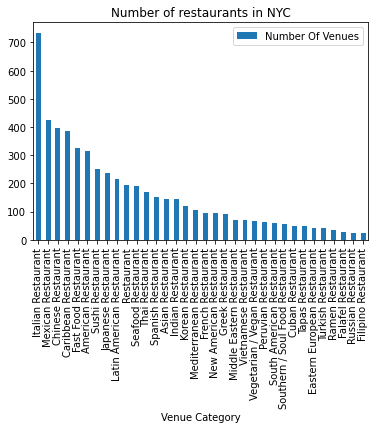

<Figure size 12960x19440 with 0 Axes>

In [37]:
ny_rest_list.plot.bar(x="Venue Category", y="Number Of Venues", rot=90, title="Number of restaurants in NYC");
plot.figure(figsize=(180,270));


plot.show(block=True);

Let's choose a type of restaurant that is not too hgi - for over competition, aot too low - for being too niche. Let's choose indian restaurants and see what we can learn about them

In [38]:
### Listing all the indian restaurants in NYC

In [39]:
ny_indian_rest = ny_venues

In [40]:
ny_indian_rest = ny_indian_rest[ny_indian_rest['Venue Category'].str.contains("Indian Restaurant")]

In [41]:
ny_indian_rest

Neighborhood  Neighborhood Latitude  \
619                     Woodlawn              40.898273   
1921                     Melrose              40.819754   
2276                  Morrisania              40.823592   
4016                   Bay Ridge              40.625801   
4486              Brighton Beach              40.576825   
4812                    Flatbush              40.636326   
4856                    Flatbush              40.636326   
4906               Crown Heights              40.670829   
4940               Crown Heights              40.670829   
4970               East Flatbush              40.641718   
5002               East Flatbush              40.641718   
5327            Prospect Heights              40.676822   
5525                Williamsburg              40.707144   
6276                 Fort Greene              40.688527   
6795                   Flatlands              40.630446   
6983             Manhattan Beach              40.577914   
7636                Clinton Hill              40.693229   
7933   Prospect Lefferts Gardens              40.658420   
7989   Prospect Lefferts Gardens              40.658420   
8037                  Ocean Hill              40.678403   
8274                     Midwood              40.625596   
8370         Prospect Park South              40.647009   
9162          Washington Heights              40.851903   
9349            Hamilton Heights              40.823604   
9478              Manhattanville              40.816934   
9511              Manhattanville              40.816934   
9576              Central Harlem              40.815976   
9585              Central Harlem              40.815976   
9716                 East Harlem              40.792249   
9876                   Yorkville              40.775930   
10161            Upper West Side              40.787658   
10166            Upper West Side              40.787658   
10593                Murray Hill              40.748303   
10629                    Chelsea              40.744035   
11037                    Tribeca              40.721522   
11299                       Soho              40.722184   
11367               West Village              40.734434   
11467           Manhattan Valley              40.797307   
11488           Manhattan Valley              40.797307   
11489           Manhattan Valley              40.797307   
11577        Morningside Heights              40.808000   
11938                    Astoria              40.768509   
11954                    Astoria              40.768509   
12053                   Woodside              40.746349   
12063                   Woodside              40.746349   
12065                   Woodside              40.746349   
12068                   Woodside              40.746349   
12069                   Woodside              40.746349   
12102                   Woodside              40.746349   
12167            Jackson Heights              40.751981   
12183            Jackson Heights              40.751981   
12191            Jackson Heights              40.751981   
12203            Jackson Heights              40.751981   
12289                   Elmhurst              40.744049   
12298                   Elmhurst              40.744049   
12313                   Elmhurst              40.744049   
12612                Kew Gardens              40.705179   
12630                Kew Gardens              40.705179   
12647                Kew Gardens              40.705179   
12660                Kew Gardens              40.705179   
12668                Kew Gardens              40.705179   
12709              Richmond Hill              40.697947   
12717              Richmond Hill              40.697947   
12726              Richmond Hill              40.697947   
12747              Richmond Hill              40.697947   
12932           Long Island City              40.750217   
12942           Long Island City              40.750217   
13023   

In [42]:
### Cleaning the data

In [43]:

inrest_clean = ny_indian_rest.drop(['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude'], axis = 1) 



In [44]:
inrest_clean = inrest_clean.reset_index()

In [45]:
inrest_clean = inrest_clean.drop(['index'], axis = 1)

In [46]:
numofinrest=inrest_clean.shape[0]

In [47]:
print('Number of indian restaurants in NYC:', numofinrest)

Number of indian restaurants in NYC: 144


In [48]:
inrest_clean

Venue  Venue Latitude  Venue Longitude  \
0                              Curry Spot       40.897625       -73.867147   
1                             Hungry Bird       40.828820       -73.916828   
2                             Hungry Bird       40.828820       -73.916828   
3                               Taj Mahal       40.632373       -74.027193   
4                            Pak Nasheman       40.579255       -73.959426   
5                            Ashoka Grill       40.635822       -73.950820   
6                               Mashallah       40.641231       -73.969321   
7                             India House       40.678708       -73.949651   
8                             Diwan Grill       40.675355       -73.956507   
9                            Silver Krust       40.642490       -73.926862   
10                           Ashoka Grill       40.635822       -73.950820   
11                            Diwan Grill       40.675355       -73.956507   
12                     Tikka Indian Grill       40.714343       -73.960903   
13                            Dosa Royale       40.689466       -73.968704   
14                           Silver Krust       40.642490       -73.926862   
15                           Pak Nasheman       40.579255       -73.959426   
16                            Dosa Royale       40.689466       -73.968704   
17             Gandhi Fine Indian Cuisine       40.655168       -73.956325   
18                        King of Tandoor       40.658937       -73.960565   
19                        Tandoori Masala       40.683978       -73.911891   
20                           Ashoka Grill       40.635822       -73.950820   
21             Gandhi Fine Indian Cuisine       40.655168       -73.956325   
22               Kismat Indian Restaurant       40.855222       -73.936967   
23          Clove Indian Restaurant & Bar       40.821280       -73.950620   
24          Clove Indian Restaurant & Bar       40.821280       -73.950620   
25                           Delhi Masala       40.808009       -73.948587   
26                           Delhi Masala       40.808009       -73.948587   
27          Clove Indian Restaurant & Bar       40.821280       -73.950620   
28                         Drunken Munkey       40.781106       -73.947549   
29                         Drunken Munkey       40.781106       -73.947549   
30                                 Ashoka       40.784842       -73.973253   
31                                 Swagat       40.783573       -73.978030   
32                    Bhatti Indian Grill       40.742065       -73.982983   
33                      Dil-e Punjab Deli       40.744845       -74.002528   
34                       Tamarind TriBeCa       40.719211       -74.008727   
35                       Tamarind TriBeCa       40.719211       -74.008727   
36                         Bombay Bistros       40.731360       -74.002530   
37                             Doaba Deli       40.799513       -73.962663   
38                              Roti Roll       40.802477       -73.964294   
39                                  Awadh       40.795722       -73.971031   
40                              Roti Roll       40.802477       -73.964294   
41                    Seva Indian Cuisine       40.765521       -73.919157   
42                              The Gully       40.766719       -73.912410   
43               Maharaja Sweets & Snacks       40.748860       -73.892367   
44                         Rajbhog Sweets       40.748961       -73.892883   
45                               Kababish       40.747700       -73.893945   
46                                Samudra       40.749001       -73.890401   
47                Angel Indian Restaurant       40.747206       -73.890967   
48                          Jackson Diner       40.747753       -73.891517   
49                                Samudra       40.749001       -73.890401   
50               Maharaja Sweets & Snacks       40.748860 

Let's create a map of all the indian restaurants for a better look.

In [49]:
### setting the initial coordinates of the map of indian restaurants with the first latitude and longitude



inrest_latitude = inrest_clean.iloc[1]['Venue Latitude']
inrest_longitude = inrest_clean.iloc[1]['Venue Longitude']

In [76]:
### generating a map of NYC indian restaurants

# create map of NYC indian restaurants using latitude and longitude values
map_indian_rest = folium.Map(location=[inrest_latitude, inrest_longitude], zoom_start=11)

# add markers to map
for lat, lng, Venue in zip(inrest_clean['Venue Latitude'], inrest_clean['Venue Longitude'], inrest_clean['Venue']):
    label = '{}'.format(Venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=1,
        parse_html=False).add_to(map_indian_rest)  
    
map_indian_rest

We can see there's a lot of potential places for this type of restaurant, we'll be using a heat map to visualize how the restaurants spread

In [51]:
ir_mat = inrest_clean[['Venue Latitude', 'Venue Longitude']]

In [52]:
irhmap = folium.Map(location=[inrest_latitude, inrest_longitude], zoom_start=13)

HeatMap(ir_mat).add_to(irhmap)

irhmap

Now let's try to find a potential places for a new one, creating a full list of neighborhoods without an indian restaurant and mapping them for a better visual. 

In [53]:
### Finding potential neighborhoods for a new indian restaurant, creaing a list of neighborhoods and a heat map

In [54]:
### creating getting the full neighborhoods list from intial data

In [55]:
full_nei_list = neighborhoods

In [56]:
full_nei_list = full_nei_list.drop(['Borough'], axis='columns', inplace=False)

In [57]:
### Creating a list of neighborhoods containing an indian restaurant from Foursqure data

In [58]:
indian_rest_nei_list = ny_indian_rest

In [59]:
indian_rest_nei_list = indian_rest_nei_list.drop(['Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'], axis='columns', inplace=False)


In [60]:
indian_rest_nei_list = indian_rest_nei_list.reset_index(drop=True)


In [61]:
indian_rest_nei_list = indian_rest_nei_list.drop_duplicates(subset ="Neighborhood", keep='first', inplace=False)


In [62]:
indian_rest_nei_list.shape

(82, 3)

In [63]:
indian_rest_nei_list = indian_rest_nei_list.reset_index(drop=True)


In [64]:
### after the data is cleaned, subtracting the indian restaurant containing list from the full neighborhood list

In [65]:
na_clean = indian_rest_nei_list

In [66]:
na_clean = na_clean.rename(columns = {'Neighborhood Latitude': 'Latitude', 'Neighborhood Longitude': 'Longitude'}, inplace = False)


In [67]:
df_pot = na_clean.merge(full_nei_list, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='right_only']


In [68]:
df_pot = df_pot.reset_index(drop=True)

df_pot = df_pot.drop(['_merge'], axis='columns', inplace=False)



In [69]:
  
df_pot

Neighborhood   Latitude  Longitude
0               Wakefield  40.894705 -73.847201
1              Co-op City  40.874294 -73.829939
2             Eastchester  40.887556 -73.827806
3               Fieldston  40.895437 -73.905643
4               Riverdale  40.890834 -73.912585
5             Kingsbridge  40.881687 -73.902818
6             Marble Hill  40.876551 -73.910660
7                 Norwood  40.877224 -73.879391
8          Williamsbridge  40.881039 -73.857446
9              Baychester  40.866858 -73.835798
10         Pelham Parkway  40.857413 -73.854756
11            City Island  40.847247 -73.786488
12           Bedford Park  40.870185 -73.885512
13     University Heights  40.855727 -73.910416
14         Morris Heights  40.847898 -73.919672
15                Fordham  40.860997 -73.896427
16           East Tremont  40.842696 -73.887356
17             West Farms  40.839475 -73.877745
18           High  Bridge  40.836623 -73.926102
19             Mott Haven  40.806239 -73.916100
20            Port Morris  40.801664 -73.913221
21               Longwood  40.815099 -73.895788
22            Hunts Point  40.809730 -73.883315
23              Soundview  40.821012 -73.865746
24           Clason Point  40.806551 -73.854144
25            Throgs Neck  40.815109 -73.816350
26           Country Club  40.844246 -73.824099
27            Parkchester  40.837938 -73.856003
28     Westchester Square  40.840619 -73.842194
29               Van Nest  40.843608 -73.866299
30            Morris Park  40.847549 -73.850402
31                Belmont  40.857277 -73.888452
32         Spuyten Duyvil  40.881395 -73.917190
33        North Riverdale  40.908543 -73.904531
34             Pelham Bay  40.850641 -73.832074
35          Schuylerville  40.826580 -73.826203
36         Edgewater Park  40.821986 -73.813885
37            Castle Hill  40.819014 -73.848027
38              Olinville  40.871371 -73.863324
39         Pelham Gardens  40.862966 -73.841612
40              Concourse  40.834284 -73.915589
41              Unionport  40.829774 -73.850535
42               Edenwald  40.884561 -73.848083
43            Bensonhurst  40.611009 -73.995180
44            Sunset Park  40.645103 -74.010316
45             Greenpoint  40.730201 -73.954241
46              Gravesend  40.595260 -73.973471
47         Sheepshead Bay  40.586890 -73.943186
48      Manhattan Terrace  40.614433 -73.957438
49             Kensington  40.642382 -73.980421
50        Windsor Terrace  40.656946 -73.980073
51            Brownsville  40.663950 -73.910235
52               Bushwick  40.698116 -73.925258
53     Bedford Stuyvesant  40.687232 -73.941785
54       Brooklyn Heights  40.695864 -73.993782
55            Cobble Hill  40.687920 -73.998561
56        Carroll Gardens  40.680540 -73.994654
57               Red Hook  40.676253 -74.012759
58                Gowanus  40.673931 -73.994441
59             Park Slope  40.672321 -73.977050
60          Cypress Hills  40.682391 -73.876616
61          East New York  40.669926 -73.880699
62          Starrett City  40.647589 -73.879370
63               Canarsie  40.635564 -73.902093
64            Mill Island  40.606336 -73.908186
65           Coney Island  40.574293 -73.988683
66             Bath Beach  40.599519 -73.998752
67           Borough Park  40.633131 -73.990498
68          Dyker Heights  40.619219 -74.019314
69        Gerritsen Beach  40.590848 -73.930102
70            Marine Park  40.609748 -73.931344
71               Sea Gate  40.576375 -74.007873
72               Downtown  40.690844 -73.983463
73            Boerum Hill  40.685683 -73.983748
74              City Line  40.678570 -73.867976
75           Bergen Beach  40.615150 -73.898556
76             Georgetown  40.623845 -73.916075
77      East Williamsburg  40.708492 -73.938858
78             North Side  40.714823 -73.958809
79             South Side  40.710861 -73.958001
80          Ocean Parkway  40.613060 -73.968367
81          Fort Hamilton  40.614768 -74.031979
82              Chinatown  40

In [70]:
print("Number of neighborhoods without an indian restaurant in new york:", len(df_pot))


Number of neighborhoods without an indian restaurant in new york: 224


There are 224 potential neighborhoods for a new indian restaurant, let's use a heat map for a better visual of the potential locations

In [71]:
### creating a heat map of potential locations for a new indian restaurant

In [72]:
### setting the initial coordinates of the map of potential locations for indian restaurants with the first latitude and longitude



inpot_latitude = df_pot.iloc[1]['Latitude']
inpot_longitude = df_pot.iloc[1]['Longitude']

In [73]:
pot_mat = df_pot[['Latitude', 'Longitude']]

In [74]:
pothmap = folium.Map(location=[inpot_latitude, inpot_longitude], zoom_start=13)

HeatMap(pot_mat).add_to(pothmap)

pothmap

 Leat's try a different kind of restaurant - Sea food restaurants. We'll create a dataframe of all the seafood restaurants in NYC and create a heat map.

In [77]:
### Creating and cleaning a Seafood restaurants database

In [78]:
ny_seafood_rest = ny_venues

In [79]:
ny_seafood_rest = ny_seafood_rest[ny_seafood_rest['Venue Category'].str.contains("Seafood Restaurant")]

In [80]:
srest_clean = ny_seafood_rest.drop(['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude'], axis = 1) 


In [81]:
srest_clean = srest_clean.reset_index(drop=True)


In [101]:
srest_clean

Venue  Venue Latitude  \
0                                     Dyre Fish Market       40.889318   
1                                          Red Lobster       40.869059   
2                                     Dyre Fish Market       40.889318   
3                                Land & Sea Restaurant       40.877885   
4                                Land & Sea Restaurant       40.877885   
5                                Roc A Tone Restaurant       40.882620   
6                                Roc A Tone Restaurant       40.882620   
7                                          Red Lobster       40.869059   
8                                         Seafood City       40.850967   
9                                          Crab Shanty       40.848807   
10                         Sammy's Fish Box Restaurant       40.839041   
11                       Sea Shore Restaurant & Marina       40.854325   
12                              Tony's Pier Restaurant       40.837484   
13                     Johnny's Famous Reef Restaurant       40.837673   
14                             JP's Seafood Restaurant       40.857695   
15                           City Island Lobster House       40.856890   
16                       Sammy's Shrimp Box Restaurant       40.839553   
17                                         Lobster Box       40.838420   
18                          El Tina Seafood Restaurant       40.864460   
19   Marisco Centro (Seafood Restaurant & Fish Market)       40.851332   
20                                   Brother's Seafood       40.830180   
21                              New Fulton Fish Market       40.803580   
22                               Land & Sea Restaurant       40.877885   
23                    Marisco Centro Seafood Resaurant       40.831440   
24                               Roc A Tone Restaurant       40.882620   
25                                         Red Lobster       40.869059   
26                                   Brother's Seafood       40.830180   
27                               Roc A Tone Restaurant       40.882620   
28                                    Dyre Fish Market       40.889318   
29                                      The Pearl Room       40.623936   
30                                          Boat House       40.642009   
31                  East Harbor Seafood Palace (迎賓大酒樓)       40.633526   
32                                       Lobster Joint       40.735414   
33                                Chateau De Capitaine       40.594209   
34                                  WOW Cafe and Grill       40.581955   
35                                 Randazzo's Clam Bar       40.583832   
36                                   Cipura Restaurant       40.583832   
37                               Jordan's Lobster Dock       40.586655   
38                      Clemente's Maryland Crab House       40.585034   
39                                  Ocean King Seafood       40.680364   
40                                      Pitkin Seafood       40.668807   
41                                     Maison Premiere       40.714239   
42                                            Sea Wolf       40.706699   
43                                  Ocean King Seafood       40.680364   
44                                      Luke's Lobster       40.703441   
45                                     Petite Crevette       40.683786   
46                                     Petite Crevette       40.683786   
47                                          Littleneck       40.677309   
48                                       Brooklyn Crab       40.675319   
49                              Red Hook Lobster Pound       40.679752   
50                                           Reed Park       40.675493   
51                                     Petite Crevette       40.683786   
52                                          Littleneck       40.677309   
53                                Puerto Plata Seafoo

In [102]:
### mapping the seafood restaurants

In [83]:
### setting the initial coordinates of the map of seafood restaurants with the first latitude and longitude



searest_latitude = ny_seafood_rest.iloc[1]['Venue Latitude']
searest_longitude = ny_seafood_rest.iloc[1]['Venue Longitude']

In [85]:
### generating a map of NYC seafood restaurants

# create map of NYC seafood restaurants using latitude and longitude values
map_seafood_rest = folium.Map(location=[searest_latitude, searest_longitude], zoom_start=12)

# add markers to map
for lat, lng, Venue in zip(ny_seafood_rest['Venue Latitude'], ny_seafood_rest['Venue Longitude'], ny_seafood_rest['Venue']):
    label = '{}'.format(Venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=1,
        parse_html=False).add_to(map_seafood_rest)  
    
map_seafood_rest

In [86]:
### creating a heat map of the Sea food restaurants in NYC

In [87]:
sr_mat = srest_clean[['Venue Latitude', 'Venue Longitude']]

In [88]:
srhmap = folium.Map(location=[searest_latitude, searest_longitude], zoom_start=11)

HeatMap(sr_mat).add_to(srhmap)

srhmap

In [89]:
seafood_rest_nei_list = ny_seafood_rest

In [90]:
seafood_rest_nei_list = seafood_rest_nei_list.drop(['Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'], axis='columns', inplace=False)

In [91]:
seafood_rest_nei_list = seafood_rest_nei_list.reset_index(drop=True)

In [92]:
seafood_rest_nei_list = seafood_rest_nei_list.drop_duplicates(subset ="Neighborhood", keep='first', inplace=False)

In [93]:
seafood_rest_nei_list.shape

(132, 3)

In [94]:
seafood_rest_nei_list = seafood_rest_nei_list.reset_index(drop=True)

In [95]:
### after the data is cleaned, subtracting the seafood restaurant containing list from the full neighborhood list

In [96]:
sea_clean = seafood_rest_nei_list

In [97]:
sea_clean = sea_clean.rename(columns = {'Neighborhood Latitude': 'Latitude', 'Neighborhood Longitude': 'Longitude'}, inplace = False)

In [98]:
df_spot = sea_clean.merge(full_nei_list, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='right_only']


In [99]:
df_spot = df_spot.reset_index(drop=True)

df_spot = df_spot.drop(['_merge'], axis='columns', inplace=False)


In [100]:
df_spot

Neighborhood   Latitude  Longitude
0                    Fieldston  40.895437 -73.905643
1                    Riverdale  40.890834 -73.912585
2                     Woodlawn  40.898273 -73.867315
3               Pelham Parkway  40.857413 -73.854756
4                 Bedford Park  40.870185 -73.885512
5                      Fordham  40.860997 -73.896427
6                 East Tremont  40.842696 -73.887356
7                   West Farms  40.839475 -73.877745
8                      Melrose  40.819754 -73.909422
9                   Mott Haven  40.806239 -73.916100
10                 Port Morris  40.801664 -73.913221
11                    Longwood  40.815099 -73.895788
12                  Morrisania  40.823592 -73.901506
13                   Soundview  40.821012 -73.865746
14                Clason Point  40.806551 -73.854144
15                 Throgs Neck  40.815109 -73.816350
16                Country Club  40.844246 -73.824099
17                 Parkchester  40.837938 -73.856003
18          Westchester Square  40.840619 -73.842194
19                    Van Nest  40.843608 -73.866299
20                 Morris Park  40.847549 -73.850402
21                     Belmont  40.857277 -73.888452
22             North Riverdale  40.908543 -73.904531
23                  Pelham Bay  40.850641 -73.832074
24               Schuylerville  40.826580 -73.826203
25              Edgewater Park  40.821986 -73.813885
26                   Unionport  40.829774 -73.850535
27                 Bensonhurst  40.611009 -73.995180
28           Manhattan Terrace  40.614433 -73.957438
29                    Flatbush  40.636326 -73.958401
30               East Flatbush  40.641718 -73.936103
31                  Kensington  40.642382 -73.980421
32             Windsor Terrace  40.656946 -73.980073
33            Prospect Heights  40.676822 -73.964859
34                 Fort Greene  40.688527 -73.972906
35                  Park Slope  40.672321 -73.977050
36               Cypress Hills  40.682391 -73.876616
37                    Canarsie  40.635564 -73.902093
38                   Flatlands  40.630446 -73.929113
39                Coney Island  40.574293 -73.988683
40                  Bath Beach  40.599519 -73.998752
41               Dyker Heights  40.619219 -74.019314
42                 Marine Park  40.609748 -73.931344
43                Clinton Hill  40.693229 -73.967843
44                    Sea Gate  40.576375 -74.007873
45   Prospect Lefferts Gardens  40.658420 -73.954899
46                Bergen Beach  40.615150 -73.898556
47                     Midwood  40.625596 -73.957595
48         Prospect Park South  40.647009 -73.962613
49                  Georgetown  40.623845 -73.916075
50           East Williamsburg  40.708492 -73.938858
51               Ocean Parkway  40.613060 -73.968367
52                   Chinatown  40.715618 -73.994279
53                      Inwood  40.867684 -73.921210
54                 East Harlem  40.792249 -73.944182
55            Roosevelt Island  40.762160 -73.949168
56                     Clinton  40.759101 -73.996119
57                     Midtown  40.754691 -73.981669
58                 Murray Hill  40.748303 -73.978332
59                        Soho  40.722184 -74.000657
60            Manhattan Valley  40.797307 -73.964286
61                    Gramercy  40.737210 -73.981376
62           Battery Park City  40.711932 -74.016869
63                    Woodside  40.746349 -73.901842
64             Jackson Heights  40.751981 -73.882821
65                      Corona  40.742382 -73.856825
66                    Flushing  40.764454 -73.831773
67               East Elmhurst  40.764073 -73.867041
68                     Maspeth  40.725427 -73.896217
69                   Ridgewood  40.708323 -73.901435
70                    Glendale  40.702762 -73.870742
71                   Woodhaven  40.689887 -73.858110
72                  Ozone Park  40.680708 -73.843203
73                  Whitestone  40.781291 -73.814202
74                     Bayside  40.766041 -

In [103]:
print("Number of neighborhoods without an seafood restaurant in new york:", len(df_spot))


Number of neighborhoods without an seafood restaurant in new york: 174


In [104]:
### setting the initial coordinates of the map of potential locations for indian restaurants with the first latitude and longitude



spot_latitude = df_spot.iloc[1]['Latitude']
spot_longitude = df_spot.iloc[1]['Longitude']

In [105]:
spot_mat = df_spot[['Latitude', 'Longitude']]

In [107]:
spothmap = folium.Map(location=[spot_latitude, spot_longitude], zoom_start=13)

HeatMap(spot_mat).add_to(spothmap)

spothmap

Now, let's see how the most popular types of restaurants spread around NYC. From the chart we made we found out italian restaurants and pizza places are the most popular types of establishments in NYC. We'll group them together and try to find potential locations for a new one, if we can find any.

In [108]:
### getting a full list of italian restaurants and pizza places in NYC

In [109]:
ny_italian_rest = ny_venues

In [110]:
ny_italian_rest = ny_italian_rest[ny_italian_rest['Venue Category'].str.contains("Italian Restaurant|Pizza Place")]

In [111]:
ny_italian_rest

Neighborhood  Neighborhood Latitude  \
12                     Wakefield              40.894705   
15                     Wakefield              40.894705   
25                     Wakefield              40.894705   
36                     Wakefield              40.894705   
40                     Wakefield              40.894705   
59                     Wakefield              40.894705   
82                    Co-op City              40.874294   
83                    Co-op City              40.874294   
95                    Co-op City              40.874294   
114                   Co-op City              40.874294   
132                   Co-op City              40.874294   
149                   Co-op City              40.874294   
151                   Co-op City              40.874294   
164                  Eastchester              40.887556   
214                  Eastchester              40.887556   
262                    Fieldston              40.895437   
263                    Fieldston              40.895437   
275                    Fieldston              40.895437   
276                    Fieldston              40.895437   
287                    Fieldston              40.895437   
298                    Fieldston              40.895437   
304                    Fieldston              40.895437   
312                    Fieldston              40.895437   
325                    Fieldston              40.895437   
345                    Riverdale              40.890834   
346                    Riverdale              40.890834   
350                    Riverdale              40.890834   
362                    Riverdale              40.890834   
375                    Riverdale              40.890834   
393                    Riverdale              40.890834   
415                  Kingsbridge              40.881687   
417                  Kingsbridge              40.881687   
448                  Kingsbridge              40.881687   
454                  Kingsbridge              40.881687   
463                  Kingsbridge              40.881687   
469                  Kingsbridge              40.881687   
473                  Kingsbridge              40.881687   
491                  Kingsbridge              40.881687   
515                  Marble Hill              40.876551   
517                  Marble Hill              40.876551   
536                  Marble Hill              40.876551   
549                  Marble Hill              40.876551   
573                  Marble Hill              40.876551   
593                  Marble Hill              40.876551   
610                  Marble Hill              40.876551   
614                     Woodlawn              40.898273   
616                     Woodlawn              40.898273   
622                     Woodlawn              40.898273   
629                     Woodlawn              40.898273   
638                     Woodlawn              40.898273   
662                     Woodlawn              40.898273   
669                     Woodlawn              40.898273   
714                      Norwood              40.877224   
718                      Norwood              40.877224   
727                      Norwood              40.877224   
742                      Norwood              40.877224   
743                      Norwood              40.877224   
790                      Norwood              40.877224   
796                      Norwood              40.877224   
799                      Norwood              40.877224   
800                      Norwood              40.877224   
802                      Norwood              40.877224   
803                      Norwood              40.877224   
820               Williamsbridge              40.881039   
853               Williamsbridge              40.881039   
862               Williamsbridge              40.881039   
864               Williamsbridge              40.881039   
867     

In [112]:
print("Number of total italian restaurants and pizza places in new york:", len(ny_italian_rest))


Number of total italian restaurants and pizza places in new york: 2099


In [113]:
itrest_clean = ny_italian_rest.drop(['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude'], axis = 1) 


In [114]:
itrest_clean = itrest_clean.reset_index(drop=True)

In [115]:
itrest_clean

Venue  Venue Latitude  \
0                                         Mario's Pizza       40.888628   
1                                          Bella Napoli       40.901047   
2                                        Domino's Pizza       40.898443   
3                                     Papa John's Pizza       40.886648   
4                                        Peppinos Pizza       40.903618   
5                                              Casa Mia       40.905293   
6                                        Capri II Pizza       40.876374   
7                                           Nicks Pizza       40.870352   
8                                          Olive Garden       40.864483   
9                                             Pizza Hut       40.868622   
10                               Little Caesars - Kmart       40.865518   
11                                       Domino's Pizza       40.876596   
12                                 Little Caesars Pizza       40.877788   
13                                        Mario's Pizza       40.888628   
14                                       Capri II Pizza       40.876374   
15                                  Salvatore's of Soho       40.887633   
16                              Kingsbridge Social Club       40.884581   
17                                           Pizza Chef       40.885640   
18                                 Broadway Joe's Pizza       40.889898   
19                                            Beccofino       40.905467   
20                                            Madison's       40.906483   
21                           Addeo's Riverdale Pizzeria       40.905757   
22                                      Dino's Pizzeria       40.905171   
23                            Van Cortlandt Coffee Shop       40.902781   
24                                           Pizza Chef       40.885640   
25                                  Salvatore's of Soho       40.887633   
26                              Kingsbridge Social Club       40.884581   
27                                          Sam's Pizza       40.879435   
28                                 Broadway Joe's Pizza       40.889898   
29                               Broadway Pizza & Pasta       40.878822   
30                              Kingsbridge Social Club       40.884581   
31                                          Sam's Pizza       40.879435   
32                                           Pizza Chef       40.885640   
33                                  Salvatore's of Soho       40.887633   
34                                             Arturo's       40.874412   
35                               Broadway Pizza & Pasta       40.878822   
36                                 Broadway Joe's Pizza       40.889898   
37                                       Jerome's Pizza       40.873107   
38                                          Sam's Pizza       40.879435   
39                                             Arturo's       40.874412   
40                              Kingsbridge Social Club       40.884581   
41                                           Pizza Chef       40.885640   
42                                  Salvatore's of Soho       40.887633   
43                                     Trattoria Inwood       40.868416   
44                                    Goodfella's Pizza       40.887121   
45                              Katonah Pizza and Pasta       40.898784   
46                               Patrizia's Of Woodlawn       40.900638   
47                                       Angelo's Pizza       40.902989   
48                                         Bella Napoli       40.901047   
49                                         La Grotta II       40.907003   
50                                       Domino's Pizza       40.898443   
51                                    Papa John's Pizza       40.886648   
52                                       Sal's Pizzeria       40.875269   


With almost 2100 italian restaurants and pizza places, our map markers will be very clustered:

In [116]:
### mapping the italian restaurants and pizza places

In [117]:
### setting the initial coordinates of the map of italian restaurants and pizza places with the first latitude and longitude



itrest_latitude = itrest_clean.iloc[1]['Venue Latitude']
itrest_longitude = itrest_clean.iloc[1]['Venue Longitude']

In [118]:
### generating a map of NYC italian restaurants and pizza places

# create map of NYC italian restaurants and pizza places using latitude and longitude values
map_italian_rest = folium.Map(location=[itrest_latitude, itrest_longitude], zoom_start=11)

# add markers to map
for lat, lng, Venue in zip(itrest_clean['Venue Latitude'], itrest_clean['Venue Longitude'], itrest_clean['Venue']):
    label = '{}'.format(Venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.3,
        parse_html=False).add_to(map_italian_rest)  
    
map_italian_rest

The heat map will give us a clearer view how hard it is to find a new location for a new italian restaurant or pizza place.

In [119]:
### Creating a heat map of italian restaurants and pizza places in NYC

In [120]:
itr_mat = itrest_clean[['Venue Latitude', 'Venue Longitude']]

In [121]:
itrhmap = folium.Map(location=[itrest_latitude, itrest_longitude], zoom_start=11)

HeatMap(itr_mat).add_to(itrhmap)

itrhmap

Let's create a list of neighborhoods without an italian restaurat or a pizza place. 

In [122]:
### Creating a list of potential neighborhoods for a new italian restaurat/pizza place and  a heat map

In [123]:
ny_italian_rest_nei = ny_italian_rest

In [124]:
ny_italian_rest_nei = ny_italian_rest_nei.drop(['Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'], axis='columns', inplace=False)



In [125]:
ny_italian_rest_nei = ny_italian_rest_nei.drop_duplicates(subset ="Neighborhood", keep='first', inplace=False)


In [126]:
ny_italian_rest_nei = ny_italian_rest_nei.rename(columns = {'Neighborhood Latitude': 'Latitude', 'Neighborhood Longitude': 'Longitude'}, inplace = False)


In [127]:
ny_italian_rest_nei = ny_italian_rest_nei.reset_index(drop=True)

In [128]:
df_it_pot = ny_italian_rest_nei.merge(full_nei_list, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='right_only']


In [129]:
df_it_pot = df_it_pot.reset_index(drop=True)

df_it_pot = df_it_pot.drop(['_merge'], axis='columns', inplace=False)

In [130]:
df_it_pot

Neighborhood   Latitude  Longitude
0  East Flatbush  40.641718 -73.936103
1       Sea Gate  40.576375 -74.007873
2    Murray Hill  40.764126 -73.812763
3     Port Ivory  40.639683 -74.174645
4      Sunnyside  40.612760 -74.097126
5      Arlington  40.635325 -74.165104
6    Bay Terrace  40.553988 -74.139166
7        Chelsea  40.594726 -74.189560
8   Howland Hook  40.638433 -74.186223

In [131]:
print("Number of neighborhoods without italian restaurants or pizza places in new york:", len(df_it_pot))


Number of neighborhoods without italian restaurants or pizza places in new york: 9


We found only 8 neighborhoods in NYC still without italian restaurant or pizza place in NYC, making our choice for a new one very limited.

In [132]:
### Creaing a heat map of potential neighborhoods for a new italian restaurat/pizza place

In [133]:

itrestpot_latitude = df_it_pot.iloc[1]['Latitude']
itrestpot_longitude = df_it_pot.iloc[1]['Longitude']

In [134]:
itrpot_mat = df_it_pot[['Latitude', 'Longitude']]

In [135]:
itrpothmap = folium.Map(location=[itrestpot_latitude, itrestpot_longitude], zoom_start=11)

HeatMap(itrpot_mat).add_to(itrpothmap)

itrpothmap

We can easily see the neighborhoods suitable for a new italian food place, very different to the other restaurant types we explored. With only 8 suitable neighborhoods, it's not recommended to get into the kind of restaurant. 

### Results

We used the foursquare API to scan around all the neighborhoods in NYC. After cleaning and visualizing the data we saw some restaurant types were over populating the city. We chose specific types of restaurant that weren't oversaturated and mapped them throughout the city. We found a lot of potential for indian and seafood restaurants. Using a heat map you can clearly see there's a lot more growing potential throughout the city. On the other hand, italian restaurants and pizza places overflowing the city. Using a heat map we saw there's hardly any room for more in the city, getting only 8 neighborhoods around the city, a very low number compared to 220 for indian restaurants.


### Conclusion

The purpose of this project was to find locations for new restaurants in NYC. We need more in depth analysis to find the best suitable location for a new restaurant based on population and actual available real estate for a new restaurant, but this project gave us a first overview on the restaurant situation in NYC.